# Section 3: The Pangeo Approach - An Implementation Guide
![Pangeo Logo](images/pangeo_logo_small.png)

[Pangeo Website](https://pangeo.io/)

![A stack of technoogies](images/pangeoStackElements_buildYourOwn.png)

In this section we will look at specific tools that allow you to build your Pangeo Implementation. As the diagram shows, a specific implementation of the Pangeo does not contain a specific stack of tools, or even one of a selection of specific monolithic stacks. Rather there are certain categories for which a specific tool must be choose, but each of the tools should be able to be swapped in and out depending on the requirements of the specific implementation. The categories of tools include:
* *Compute platform* -  Where will the actual computation take place. Options - HPC, public cloud provider (AWS, Azure, Alibaba, Digital Ocean), private cloud (e.g. European Weather Cloud, JASMIN), Cluster, Local Machine
  * Compute mode - how will compute be triggered. Options - Interactiver notebooks, batch scheduler, serverless architecture (e.g. AWS lambda)
  * How will my compute be scaled elastically? Options - kubernetes, AWS ECS, Dask Cloud Provider
* *Data storage* - Where will the data be stored? Options - Distributed cloud storage, Relational Database, Data warehouse
  * Data format - What format will the data be stored in? Options - NetCDF, CSV, RDS, Zarr, TileDB
  * Data model - What will handle interpreting data and metadata as a cohesive data model?
  * Data arrays - What will handle the raw processing of arrays of numbers? Options: dask, numpy
* *Interaction* - How will I interact with the compute and data? Options - Jupyter notebook, dashboard website
* *Environment management* - What will create the software environment for my research? Options: conda, pip, docker containers


## Cloud computing

The advent of cloud computing services allows us to provision the compute services we need for scientific in a completely different way, and one that is more suitable for the sort of workflows and expertise that we can expect an average researcher to have. We can use the different core services of the cloud providers for the different elements of Pangeo system in different ways. Although you can generally swap different elements in and out of the stack of a particular Pangeo implementation, you generally need to choose one platform provider e.g. AWS, Azure etc. as it is either necesarry or optimal for these to work together. We will now take a look at what cloud services we might use in our stack. 


### Low level services

When setting up a compute platform we start by thinking in terms of low-level components of CPUs and storage space. All major *cloud service providers* (CSPs) have similar comparable offerings in this space. The ability to easily provision computing resources like is often called **infrastructure as a service**.

https://en.wikipedia.org/wiki/Infrastructure_as_a_service

The table below shows the names of the comparable services on different platforms.
 
 
Service / Provider | AWS | Azure | GCP 
--- |--- |--- |---  
Compute (VM) | EC2 | Azure VM | Compute Engine
Object Storage | S3 | Blob Storage | Cloud Storage

Comparison of offerings: http://comparecloud.in

Our Pangeo implementation will use the APIs provided by CSPs to quickly obtain the resources needed to spin up our platform and configure them for appropriate access, interoperability and security.

### High-level service - Platform as a Service etc.

As the offerings from CSP have developed, new more specialised services have been created. Using low-level services, users have to set up all aspects of the environment for their particular application, choosing appropriate configurations for sharing, security, reliability etc. Usually this means specialised software engineers or infrastructure engineers to make this happen. For a large organisation, there are sufficient people and skills to maintain the goal of separation of concerns, but this is not true for smaller groups and organisations. Instead, one can use higher level services where the technical details are taken care of. Increasingly higher-level service components, sch as data warehousing and machine learning platforms where low-level configuration is taken care of, are being part of the software stack for Pangeo implementations. 

https://en.wikipedia.org/wiki/Platform_as_a_service

Service / Provider | AWS | Azure | GCP 
--- |--- |--- |---  
Machine Learning | Sagemaker | AzureML | DataLab / Cloud AutoML
Database | RDS | Azure SQQL DB | Cloud SQL
Data Warehouse | 
Query aaS | Athena | Data Lake Analytics | BigQuery

We also have 3rd party providers of these higher level services, building value-added layers on the low-level infrastrucutre of major CSPs to deliver specialised services, for example database solutions ([TileDB](https://tiledb.com/) or [MongoDB](https://www.mongodb.com/cloud))  or machine learning platforms ([Determined AI](https://determined.ai/enterprise/)

CSPs liken the development of cloud computing to the development of an integrated grid for electricity distribution. In the early days of electricity each factory had their own generators and required expertise in electrical engineering. With a electricity grid, central suppliers provide the electricity and the associated expertise to run it. This is the direction that computing is going in. The trade-off is that while higher level services are easier to get started with and use, they often are less portable resulting in vendor lock-in. So we balance the convenience of higher-level services in our Pangeo implementation with the goals of reproducible, shareable research which favour open-source tools deployed on low-level services.

### More information on cloud providers

* AWS
* Azure
* Digital Ocean

Comparison of cloud providers: https://www.varonis.com/blog/aws-vs-azure-vs-google/

## Creating and sharing the tool stack

One of the challenges of computing platforms is setting up the right environment of tools and libraries to support the scientific research being done, while avoiding this task consuming all the researcher's time. There have been substantial developments in this space which make this task easier and support the goals of reproducible and shareable research and aid in separation of concerns.



### Environment managers - pip and conda

Particularly in the python ecosystem, tools such as *pip* and *conda* allow one to specify the tools to deploy on a particular compute instance as a file, allowing an **infrastructure as code** (IaC) approach to tools.  As with cloud resource provision, complete specification of the configuration as a file allows others to reproduce the environment and thus reproduce the scientific research. This is not always yet as easy and trouble free as we would hope, but these tools have gone a long way towards this goal and are often used as part of a Pangeo implemntation to configure the research environment.

Additional info
* pip https://pip.pypa.io/en/stable/
* conda https://docs.conda.io/en/latest/


## Containers

Another similar tool is *containers*. These are essentially lightweight virtual machines intended for running a single task efficiently and at scale. As with environemnt managers, you completely configure an *image* through a cofiguration which specifies what should be installed and configured inside the container. You then build a particular *instance* of your container from the image. One can build hundred of instances to run in parallel. Compute jobs can then be distirbuted among these containers at a task or distribution level, to make use of the massively parallel, distributed nature of the compute and data storage infrastructure. Over time, repositories of ready made containers have built up, so a researcher should not need to do much configuration to get started.



Additional information
* docker: library for creating and running containers - https://docker.com 
* Docker Hub: library of ready to use containers - https://hub.docker.com/

## Orchestration

The challenge in distributed computing is always getting the many individual workers to coordinate the work they are doing. Before they start doing any actual work, the cluster of workers must be set up appropriately from the cloud resourced we have requested to enable this inter-task communication. This is the job of orchestration software. Once again, we use an Infrastructure as code apporach to specify how many workers we want and how they should be configured and the orchestration software then acquires and sets up the resources, such as cloud VMs running containers.

Additional info:
* Kubernetes - https://kubernetes.io/
* AWS Elastic Container Service - https://aws.amazon.com/ecs/?whats-new-cards.sort-by=item.additionalFields.postDateTime&whats-new-cards.sort-order=desc
* Azure Container services - https://azure.microsoft.com/en-gb/product-categories/containers/

## Task Distribution

With our compute cluster set up and running, we then need a way to execute our tasks in a distributed fashion. We need a way to handling splitting our large dataset into sub-domains where a particular operation can be performed separately on each sub-domain or a separate compute worker. One library that does this is dask.

Dask is a task scheduling library which support **lazy execution**. This means that it doesn't actually do any calculations until it needs to. So when you string together a series of operations, for example 

* load data
* extract subset for a country or region
* calculate mean for each year for country
* plot annual means

The calculation will only be triggered when you try to plot the data, as it then needs the actual number. Before that point it creates a [*task graph*](https://docs.dask.org/en/latest/graphs.html), describing all the tasks that need to computed and which tasks are dependant on other tasks. When it decides it needs the results, all of the elements in the graph are calcualted in the order required by the dependencies. 

How does it do this is a massively parallel way to speed up execution? There are three parts to the dask compute resources

* a client - usually the computer we are interacting on 
* a scheduler - the instance the divides up the task and communicates with the workers
* workers - compute instances doing the actual work sent to them by the scheduler.

When computation is triggered, the scheduler figures out how to assign jobs to workers in the correct order according to the task graph, and then gets the results back from the workers. The task graph will split up operation into parallel operations (*task distribution*) as well as splliting large array by chunk (*data distribution*). Each task is a separate node in the graph and will be sent to a separate worker. This allows for massive, elastic, scaling of compute organised interactively.

Additional Information:
* dask -https://dask.org/
* dask distributed - https://distributed.dask.org/en/latest/
* dask cloud provider https://cloudprovider.dask.org/en/latest/

## Distributed computing with dask - A Demonstration

At last we come to a demonstration of actually computing with actual source code. This will show how we can do a fairly simple mean calculationm on a large array. This seem quite simple, but is similar to many of the questions we want to ask, which are string together a series of simple operation, often something subset by time and location, calculate mean,min and max. The challenge is doing so an an ensemble of global climate predictions for 100 years! So what does this look like on dask.

We start by creating a client object, which also creates connected scheduler and worker objects. We're creating this locally, but this could be connected to a cluster on any sort of infrastructure:
* local machine
* cloud cluster
* on-premises cluster
* HPC

The cluster absracts away the details of the implemtations.

In [1]:
import dask.distributed

Our client shows some details and provides us with a dashboard we can look at, which for a local cluster is at `localhost:8787/status`

In [2]:
client = dask.distributed.Client()
client

/anaconda/envs/pangeo-lectures-env/lib/python3.8/site-packages/distributed/node.py:177: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 36999 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:36999/status,
Dashboard: http://127.0.0.1:36999/status,Workers: 4
Total threads: 4,Total memory: 27.42 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:34005,Workers: 4
Dashboard: http://127.0.0.1:36999/status,Total threads: 4
Started: Just now,Total memory: 27.42 GiB
Comm: tcp://127.0.0.1:39979,Total threads: 1
Dashboard: http://127.0.0.1:39501/status,Memory: 6.86 GiB
Nanny: tcp://127.0.0.1:41887,


Now we can set up our computation. In this case we want to find the mean of an array. To use dask for our computation, we use a dask array data structure rtather than a standard numpy array. Dask aims to present the same interface for major data type, for example
* numpy array - dask array
* pandas dataframe - dask dataframe

You can also manually create a graph through creating *delayed* functions through the dask API, where normal python functions are added to a task graph to be executed later. Here we are using the dask data types, and this will construct our task graph for us.

In [3]:
import dask.array

In [4]:
my_array = dask.array.random.random((1000, 1000), chunks=(100, 100))

In [5]:
my_array.mean()

dask.array<mean_agg-aggregate, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>

In [6]:
my_array.mean().compute()

0.49993091599276024

![Dask Task Graph](images/dask_taskGraph.png)
This is what the graph looks like for our small operation. Each chunk is a node in the graph, and then the scheduler gathers together the result to present in our notebook.

Task graphs can also be visualised using the Graphviz library: 
 * https://docs.dask.org/en/latest/graphviz.html
 
With those technologies, our scientific compute platform is able to scale effectively to deal with an arbitrarily big dataset by adding additional distributed workers and increasing the data distribution by splitting processing into more tasks in the task graph, which can be executed in parallel by our distributed workers. This is similar in some ways to a scheduled cluster system, with the difference being that the way it is triggered can be transparent to the user, who simply writes code in a natural way to perform operations on arrays, and dask distributes the works transparently.

Video demonstration of scaling with a dask cluster:
* https://www.youtube.com/watch?v=R2xntfsDxtA

## Interactivity & portability

What about interacting with our system. A core goal of our system was a high level of rich interaction that provided an intuitive experience for the scientific researcher, augmenting rather than interrupting their train of thought as they consider their current research question. The desktop naturally provides an interactive workflow, but doesn't scale easily. We need a solution that is hosted close to the scaleable compute. A browser-based solution mean that we can have a graphically-rich, interactive experience in the cloud, using our desktop/laptop/tablet as a *thin-client*. The most common tool of this sort is the **Jupyter notebook**, which is how this material is being presented.

Jupyter notebooks are an example of [*literate programming*](https://en.wikipedia.org/wiki/Literate_programming)  paradigm described by Computer Scientist Donald Knuth, where the presentation of the computer code is accompanied by an examplanation of what it does, and the order and structure of presentation is focused on the human audience for the code, rather than the computer which will execute it.



### Components and structure
Jupyter notebooks are composed of cells, which can be code or markdown. Through this they contain 3 elements
* *code*: in a code cell - you run a cell to execute all code in the cell. 
  * code executes in a specified *kernel*. 
* *results*: below a code cell - when a code cell is run, it may produce result, as text an image such as a plot or rich content specified as html, which might be interactive.
* *markdown fragments including text, images etc.*: a markdown cell - Explantation of the code and results is found in markdown cells which should interspersed with the code and results.

For examples of how notebooks can be used as part of an interactive computing experience, there are many galleries with real world demonstrations including:
* Pangeo gallery http://gallery.pangeo.io/
* Iris examples https://scitools-iris.readthedocs.io/en/latest/generated/gallery/index.html

## Visualisation and Dashboarding

A key component of interactivity is to visualise the data we are using and the results we produce. A Pangeo implemtation will include tools in the software stack for visulisation. Common visualisation tools used with Pangeo include:
* [Matplotlib]() Widely-used Python library for plotting, primarily creates static output.
* [Bokeh](https://docs.bokeh.org/en/latest/index.html) A python library to create javascript web pages for interactive visualisations.
* [Plotly](https://plotly.com/python/) A eco-sytem for creating data science focused apps and visualisations

Combined with the scaling provided by dask, we can easily load and analyse large datasets and viosualisae the results. More than this we can use interactive tools with this capcity to generate results on demand. 

Lets look at an example of analysing climate data from the Coupled Model Intercomparison Project 6th phase (CMIP6) on the fly using the stack we have built up.

http://gallery.pangeo.io/repos/pangeo-gallery/cmip6/intake_ESM_example.html

We are loading our data through an *intake catalog*, which will investigate further in section 4, which is focused on data.

In [7]:
import intake

In [8]:
import numpy
import iris
import matplotlib.pyplot
import iris.quickplot

In [9]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
col

,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,700
grid_label,10
zstore,514961
dcpp_init_year,60


In [10]:
col

,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,700
grid_label,10
zstore,514961
dcpp_init_year,60


In [11]:
tasmax_dwd_ssp585 = col.search(
    experiment_id=["ssp585"],
    variable_id="tasmax",
    grid_label="gn",
    institution_id='DWD',
).to_dataset_dict()['ScenarioMIP.DWD.MPI-ESM1-2-HR.ssp585.Amon.gn'].tasmax.to_iris()


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [12]:
tasmax_dwd_ssp585

<iris 'Cube' of air_temperature / (K) (-- : 1; time: 1032; latitude: 192; longitude: 384)>

In [13]:
import iris.analysis

In [14]:
sample_points = [('latitude', 51), ('longitude', -3)]
tasmax_dwd_ssp585_timeseries = tasmax_dwd_ssp585.interpolate(sample_points, iris.analysis.Linear())
tasmax_dwd_ssp585_timeseries

<iris 'Cube' of air_temperature / (K) (-- : 1; time: 1032)>

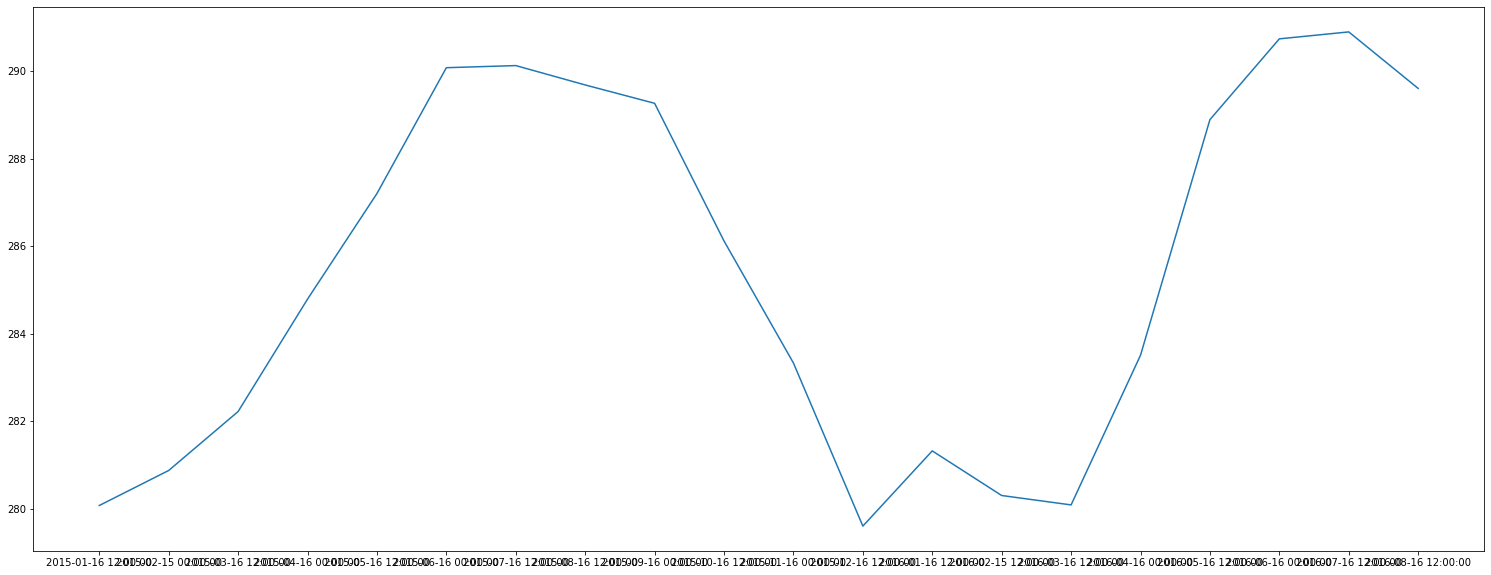

In [15]:
fig1 = matplotlib.pyplot.figure('cmip6_ts', figsize=(26,10))
ax1 = fig1.add_subplot(1,1,1)
ax1.plot([str(i1) for i1 in tasmax_dwd_ssp585_timeseries.coord('time').cells()][:20], tasmax_dwd_ssp585_timeseries[0,:].data[:20])

In [16]:
import bokeh
import bokeh.plotting
import bokeh.io

In [17]:
bokeh.io.output_notebook()

Loading BokehJS ...

In [18]:
p = bokeh.plotting.figure(plot_width=1000, plot_height=400)

# add a line renderer
# p.line([str(i1) for i1 in tasmax_dwd_ssp585_timeseries.coord('time').cells()][:20], tasmax_dwd_ssp585_timeseries[0,:].data[:20])
p.line(range( tasmax_dwd_ssp585_timeseries[0,:].data.shape[0]), tasmax_dwd_ssp585_timeseries[0,:].data)

# p.line([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], line_width=2)
bokeh.plotting.show(p)

## Existing example installations 

Pangeo has been installed in many different places around the world. Here are some example installations
* Informatics Lab research deployment - AWS, Azure
* Cheyenne HPC
* JASMIN academic computing service

Other services are available that contain many of the elements of a Pangeo implementation:
* AWS sagemaker, Azure ML
* Jupyter lab running on a local computer


## Getting started

If you want to set up your own Pangeo instance, the Pangeo community has lots of different recipes and examples for doing, available through the Pangeo Community Website, and community help available through Discourse:

* Deployment guide: https://pangeo.io/setup_guides/index.html
* Pangeo Discourse https://discourse.pangeo.io/